In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.model_selection import cross_val_score, StratifiedShuffleSplit
from sklearn.metrics import classification_report, f1_score, recall_score, precision_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRFClassifier, XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, PowerTransformer, StandardScaler
import pickle as pk
import warnings
from imblearn.over_sampling import KMeansSMOTE, ADASYN, SMOTE
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
pd.set_option('display.max_columns', 28)
df = pd.read_csv('Train.csv', index_col='ID')
df.sample(5)

,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
ID,,,,,,,,,,,,,,,,,,,,,,,,,,
ID_MO7DY9R6,1974,Graduation,Married,78369.6,0,0,11-09-2013,67,1,7,8,12,718,3,264,120,80,34,4,0,0,1,1,0,0,0
ID_21FYKCAR,1980,Basic,Single,19216.8,1,1,17-03-2013,49,4,1,1,4,8,12,4,7,8,7,3,0,0,0,0,0,0,0
ID_DLVLY8SE,1987,2n Cycle,Married,26346.0,1,0,07-09-2013,88,2,2,1,3,10,4,7,17,14,11,6,0,0,0,0,0,0,0
ID_QGA9ASH8,1949,Graduation,Single,109010.4,0,0,29-07-2013,64,1,4,9,13,779,73,118,182,187,93,1,0,0,0,0,0,0,0
ID_3AIMMTYI,1966,Graduation,Married,71704.8,0,1,01-12-2012,103,3,5,2,6,120,30,44,4,146,139,5,0,0,0,0,0,0,1


In [3]:
test_df = pd.read_csv('Test.csv', index_col='ID')
test_df.sample(5)

,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain
ID,,,,,,,,,,,,,,,,,,,,,,,,,
ID_EJY87070,1982,Graduation,Divorced,34212.0,1,1,13-04-2013,79,3,2,0,4,49,8,19,0,4,19,5,0,0,0,0,0,0
ID_OALUUF1U,1958,Graduation,Single,NaN,1,1,27-05-2014,52,1,1,0,2,12,3,8,2,0,1,7,0,0,0,0,0,0
ID_WPW63DHM,1954,PhD,Single,55477.2,2,1,26-11-2012,94,4,6,1,4,194,5,55,0,5,12,9,0,0,0,0,0,0
ID_S7ZEB59M,1959,PhD,Single,95713.2,0,1,04-10-2013,39,1,5,2,11,420,8,124,15,35,11,3,0,0,0,0,0,0
ID_1XDTSD0P,1979,Master,Single,81710.4,0,0,16-12-2013,14,2,2,6,10,857,63,207,78,36,48,5,0,0,0,0,0,0


<AxesSubplot:xlabel='Response', ylabel='count'>

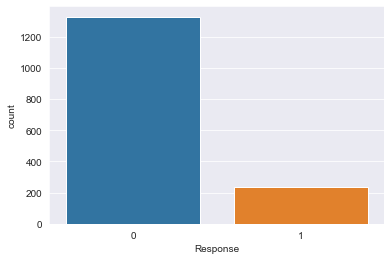

In [5]:
sns.countplot(data=df, x= 'Response')

In [51]:
df.Response.value_counts()

0    1329
1     239
Name: Response, dtype: int64

In [4]:
df.shape

(1568, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1568 entries, ID_4A9AR6FQ to ID_AKHOY7EI
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year_of_Birth            1568 non-null   int64  
 1   Education_Level          1568 non-null   object 
 2   Marital_Status           1568 non-null   object 
 3   Disposable_Income        1552 non-null   float64
 4   No_of_Kids_in_home       1568 non-null   int64  
 5   No_of_Teen_in_home       1568 non-null   int64  
 6   Date_Customer            1568 non-null   object 
 7   Recency                  1568 non-null   int64  
 8   Discounted_Purchases     1568 non-null   int64  
 9   WebPurchases             1568 non-null   int64  
 10  CatalogPurchases         1568 non-null   int64  
 11  StorePurchases           1568 non-null   int64  
 12  Amount_on_Wines          1568 non-null   int64  
 13  Amount_on_Fruits         1568 non-null   int64  
 14  Amount_on_Me

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Birth,1568.0,1970.073342,11.920781,1900.0,1960.0,1971.0,1979.00,1997.0
Disposable_Income,1552.0,62381.186598,32089.169563,2076.0,41612.4,60964.2,81493.20,799999.2
No_of_Kids_in_home,1568.0,0.460459,0.540361,0.0,0.0,0.0,1.00,2.0
No_of_Teen_in_home,1568.0,0.497449,0.544151,0.0,0.0,0.0,1.00,2.0
Recency,1568.0,55.408801,28.788037,7.0,31.0,56.0,80.00,106.0
Discounted_Purchases,1568.0,2.292730,1.937544,0.0,1.0,2.0,3.00,15.0
WebPurchases,1568.0,4.001276,2.773748,0.0,2.0,3.0,6.00,27.0
CatalogPurchases,1568.0,2.665816,3.043493,0.0,0.0,2.0,4.00,28.0
StorePurchases,1568.0,5.703444,3.260553,0.0,3.0,5.0,8.00,13.0
Amount_on_Wines,1568.0,303.190051,340.141396,5.0,27.0,167.0,499.50,1498.0


In [7]:
df.describe(include = 'object').T

,count,unique,top,freq
Education_Level,1568,5,Graduation,802
Marital_Status,1568,8,Married,615
Date_Customer,1568,619,12-05-2014,10


In [8]:
df.isna().sum()

Year_of_Birth               0
Education_Level             0
Marital_Status              0
Disposable_Income          16
No_of_Kids_in_home          0
No_of_Teen_in_home          0
Date_Customer               0
Recency                     0
Discounted_Purchases        0
WebPurchases                0
CatalogPurchases            0
StorePurchases              0
Amount_on_Wines             0
Amount_on_Fruits            0
Amount_on_MeatProducts      0
Amount_on_FishProducts      0
Amount_on_SweetProducts     0
Amount_on_GoldProds         0
WebVisitsMonth              0
Cmp3Accepted                0
Cmp4Accepted                0
Cmp5Accepted                0
Cmp1Accepted                0
Cmp2Accepted                0
Any_Complain                0
Response                    0
dtype: int64

In [9]:
df.Education_Level.unique()

array(['Graduation', '2n Cycle', 'Master', 'PhD', 'Basic'], dtype=object)

In [10]:
df.Marital_Status.unique()

array(['Divorced', 'Together', 'Single', 'Married', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [11]:
df[df.Marital_Status == 'Absurd'][['Marital_Status', 'No_of_Kids_in_home', 'No_of_Teen_in_home']]

,Marital_Status,No_of_Kids_in_home,No_of_Teen_in_home
ID,,,
ID_H7PF6YO0,Absurd,0,0


In [12]:
df[df.Marital_Status == 'YOLO'][['Marital_Status', 'No_of_Kids_in_home', 'No_of_Teen_in_home']]

,Marital_Status,No_of_Kids_in_home,No_of_Teen_in_home
ID,,,
ID_GXWQ4PIW,YOLO,0,1
ID_Y4YZ1WF3,YOLO,0,1


<AxesSubplot:xlabel='Disposable_Income', ylabel='Count'>

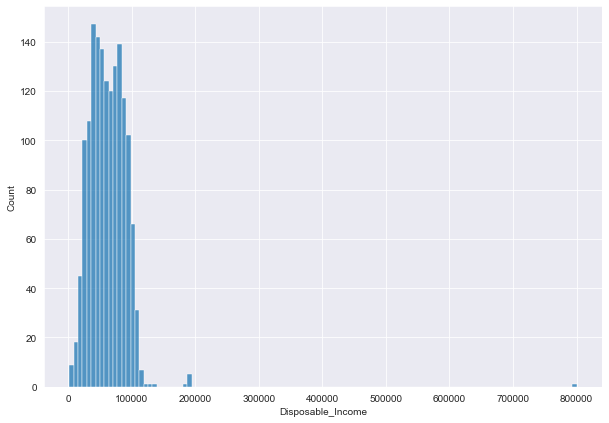

In [13]:
plt.figure(figsize=(10,7))
sns.histplot(data=df, x='Disposable_Income')

<AxesSubplot:xlabel='Recency', ylabel='Count'>

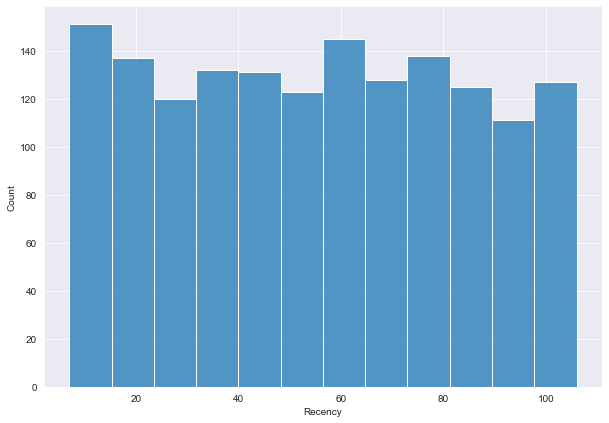

In [14]:
plt.figure(figsize=(10,7))
sns.histplot(data=df, x='Recency')

In [4]:
df.Disposable_Income.fillna(df.Disposable_Income.median(), inplace = True)

In [9]:
df.isna().sum()

Year_of_Birth              0
Education_Level            0
Marital_Status             0
Disposable_Income          0
No_of_Kids_in_home         0
No_of_Teen_in_home         0
Date_Customer              0
Recency                    0
Discounted_Purchases       0
WebPurchases               0
CatalogPurchases           0
StorePurchases             0
Amount_on_Wines            0
Amount_on_Fruits           0
Amount_on_MeatProducts     0
Amount_on_FishProducts     0
Amount_on_SweetProducts    0
Amount_on_GoldProds        0
WebVisitsMonth             0
Cmp3Accepted               0
Cmp4Accepted               0
Cmp5Accepted               0
Cmp1Accepted               0
Cmp2Accepted               0
Any_Complain               0
Response                   0
dtype: int64

In [5]:
map = {'Divorced':'Single', 'Together':'Married', 'Widow':'Single', 'Absurd':'Single', 'YOLO':'Married', 'Single':'Single', 'Married':'Married'}
df.Marital_Status = df.Marital_Status.map(map)

In [6]:
df.Education_Level = df.Education_Level.apply(lambda x: 'Graduation' if x == '2n Cycle' else x)

In [7]:
Date = pd.to_datetime(df.Date_Customer)
#df['Date_Customer_Day'] = Date.dt.day
#df['Date_Customer_Month'] = Date.dt.month
df['Date_Customer_year'] = Date.dt.year

In [8]:
df.drop(columns=['Date_Customer','Year_of_Birth'], inplace = True)

In [19]:
df.head()

,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response,Date_Customer_year
ID,,,,,,,,,,,,,,,,,,,,,,,,,
ID_4A9AR6FQ,Graduation,Single,77504.4,1,1,56,2,1,1,4,71,3,16,0,6,20,3,0,0,0,0,0,0,0,2014
ID_X28T3VEK,Graduation,Married,56784.0,0,1,17,6,5,1,8,205,22,111,50,15,19,6,0,0,0,0,0,0,0,2013
ID_AWXARH57,Graduation,Single,103714.8,0,0,17,0,7,4,7,469,31,873,29,18,37,2,0,0,0,1,0,0,1,2013
ID_FQVZHE81,Graduation,Single,46311.6,1,0,49,3,4,1,3,56,15,49,17,24,24,8,0,0,0,0,0,0,0,2013
ID_QVLWGPRN,Graduation,Married,87486.0,0,0,59,1,3,7,9,412,117,445,181,165,203,1,0,0,0,1,0,0,0,2014


In [20]:
df.Date_Customer_year.unique()

array([2014, 2013, 2012], dtype=int64)

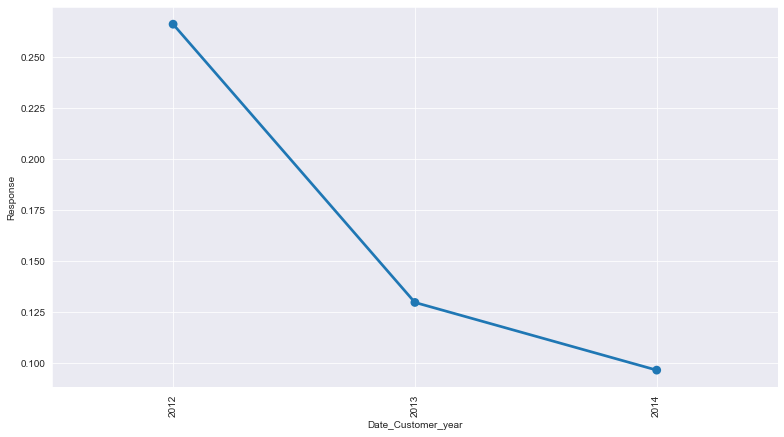

In [21]:
plt.figure(figsize=(13, 7))
sns.pointplot(data=df, x = 'Date_Customer_year', y = 'Response', ci = None)
plt.grid(b= True, which='both')
plt.xticks(rotation = 90);

In [9]:
df = pd.get_dummies(data=df, prefix=['Year', 'Status', 'Education'], 
               columns=['Date_Customer_year', 'Marital_Status', 'Education_Level'], drop_first=True)

In [10]:
y = []
for x in df.select_dtypes(include = np.number).columns:
    if (df[x].min() == 0 and (df[x].max() >=0 and df[x].max() <=3)):
        print(x)
    else: y.append(x)
print(y)

No_of_Kids_in_home
No_of_Teen_in_home
Cmp3Accepted
Cmp4Accepted
Cmp5Accepted
Cmp1Accepted
Cmp2Accepted
Any_Complain
Response
Year_2013
Year_2014
Status_Single
Education_Graduation
Education_Master
Education_PhD
['Disposable_Income', 'Recency', 'Discounted_Purchases', 'WebPurchases', 'CatalogPurchases', 'StorePurchases', 'Amount_on_Wines', 'Amount_on_Fruits', 'Amount_on_MeatProducts', 'Amount_on_FishProducts', 'Amount_on_SweetProducts', 'Amount_on_GoldProds', 'WebVisitsMonth']


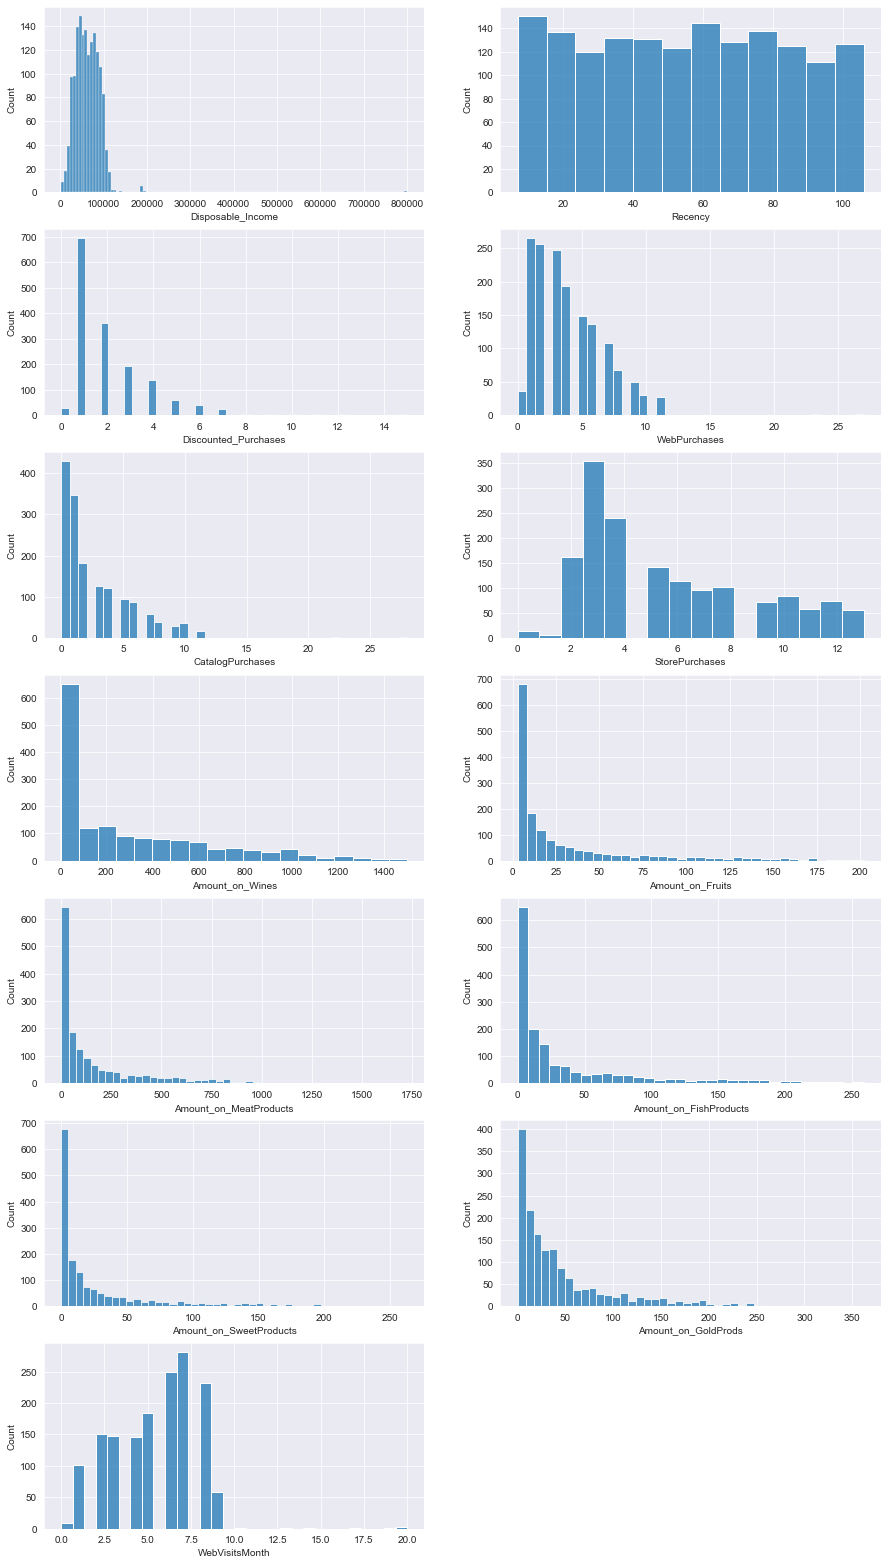

In [20]:
plt.subplots(figsize=(15, 28))
for x, y in zip(np.arange(1, len(y)+1), y.copy()):
    plt.subplot(7,2,x)
    sns.histplot(x=df[y])

In [11]:
scaler = StandardScaler()

In [12]:
u = pd.DataFrame(scaler.fit_transform(df[y]))
u.rename(columns = {x:y for x, y in zip(u.columns, y)}, index ={x:y for x, y in zip(u.index, df.index)}, inplace = True)

In [13]:
df.drop(columns = y, inplace = True)

In [14]:
df = u.merge(df, left_index=True, right_index=True)
df.head()

,Disposable_Income,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,No_of_Kids_in_home,No_of_Teen_in_home,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response,Year_2013,Year_2014,Status_Single,Education_Graduation,Education_Master,Education_PhD
ID_4A9AR6FQ,0.474311,0.020543,-0.151131,-1.082374,-0.547512,-0.522607,-0.682846,-0.659651,-0.653007,-0.688552,-0.509256,-0.460283,-0.942970,1,1,0,0,0,0,0,0,0,0,1,1,1,0,0
ID_X28T3VEK,-0.174925,-1.334619,1.913997,0.360178,-0.547512,0.704570,-0.288766,-0.179283,-0.245885,0.237756,-0.288909,-0.479672,0.272965,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
ID_AWXARH57,1.295566,-1.334619,-1.183695,1.081454,0.438512,0.397776,0.487629,0.048259,3.019658,-0.151293,-0.215460,-0.130667,-1.348282,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0
ID_FQVZHE81,-0.503058,-0.222691,0.365151,-0.000460,-0.547512,-0.829401,-0.726959,-0.356261,-0.511586,-0.373607,-0.068562,-0.382726,1.083589,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0
ID_QVLWGPRN,0.787066,0.124786,-0.667413,-0.361098,1.424536,1.011365,0.319998,2.222556,1.185468,2.664683,3.383545,3.087940,-1.753594,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0


In [15]:
X = df.drop(columns='Response')
y = df['Response']

In [16]:
df_0 = df[df['Response'] == 0]
df_1 = df[df['Response'] == 1]

In [17]:
df_1_over = df_1.sample(n = 1000, replace=True)

In [18]:
oversampled_df = pd.concat([df_0, df_1_over], axis=0)
oversampled_df = oversampled_df.sample(frac=1)
oversampled_df.head()

,Disposable_Income,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,No_of_Kids_in_home,No_of_Teen_in_home,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response,Year_2013,Year_2014,Status_Single,Education_Graduation,Education_Master,Education_PhD
ID_6VSW3OVS,-0.595666,-0.083700,1.913997,-0.361098,1.753211,-0.522607,-0.415225,0.427497,-0.177318,0.571227,0.714895,-0.130667,-0.537659,0,1,1,0,0,0,0,0,1,1,0,1,1,0,0
ID_1UGT4K1P,0.482809,1.132470,-0.667413,1.081454,-0.218837,1.318159,-0.015263,-0.659651,-0.190174,2.627631,1.718699,0.160171,-0.132347,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
ID_VL4A6IIN,0.252660,-0.952394,-0.667413,1.442092,-0.218837,-0.522607,0.008264,-0.381544,-0.460160,-0.614447,-0.484773,-0.634786,0.678277,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
ID_093HFBTK,-0.433536,0.124786,0.881433,-0.361098,-0.547512,-0.522607,-0.744605,-0.356261,-0.498729,-0.225398,-0.117528,-0.596008,0.678277,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0
ID_OXZ0IA9B,-1.018514,-0.570169,-0.667413,-1.443012,-0.876186,-0.829401,-0.868122,-0.507956,-0.691576,-0.688552,-0.656154,-0.789900,0.678277,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [19]:
X_oversampled_df = oversampled_df.drop(columns = 'Response')
y_oversampled_df = oversampled_df['Response']

In [34]:
oversampler = ADASYN(n_neighbors=5)

In [35]:
X_over, y_over = oversampler.fit_resample(X.values, y.values)

In [20]:
splitter = StratifiedShuffleSplit(n_splits=15, test_size=0.2)

for train_index, val_index in splitter.split(X_oversampled_df, y_oversampled_df):
    X_train, X_val = X_oversampled_df.iloc[train_index], X_oversampled_df.iloc[val_index]
    y_train, y_val = y_oversampled_df[train_index], y_oversampled_df[val_index]

In [21]:
ad = AdaBoostClassifier(RandomForestClassifier())

In [43]:
ad.fit(X_train, y_train)
y_pred = ad.predict(X_val)
train_pred = ad.predict(X_train)
f1_score(y_val, y_pred)

0.9851485148514851

In [23]:
gb = GradientBoostingClassifier()

In [24]:
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_val)
train_pred_gb = gb.predict(X_train)
f1_score(y_val, y_pred_gb)

0.8952380952380952

In [25]:
rb = RandomForestClassifier()

In [26]:
rb.fit(X_train, y_train)
y_pred_rb = rb.predict(X_val)
train_pred_rb = rb.predict(X_train)
f1_score(y_val, y_pred_rb)

0.9660194174757281

In [27]:
vote_cal = VotingClassifier(estimators=[('Adaboost', ad), ('gradient_boost', gb), ('random_forest', rb)], voting='hard')

In [28]:
vote_cal.fit(X_train, y_train)
y_pred_vote_cal = vote_cal.predict(X_val)
train_pred_vote_cal = vote_cal.predict(X_train)
f1_score(y_val, y_pred_vote_cal)

0.9590361445783133

In [29]:
xgb = XGBClassifier()

In [30]:
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_val)
train_pred_xgb = xgb.predict(X_train)
f1_score(y_val, y_pred_xgb)

[10:48:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9476190476190477

In [31]:
xgbr = XGBRFClassifier()

In [32]:
xgbr.fit(X_train, y_train)
y_pred_xgbr = xgbr.predict(X_val)
train_pred_xgbr = xgbr.predict(X_train)
f1_score(y_val, y_pred_xgbr)

[10:49:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8431372549019608

In [50]:
predict_train = pd.DataFrame({'ad':train_pred, 'gb':train_pred_gb, 'rb':train_pred_rb, 'vote_cal':train_pred_vote_cal, 'xgb':train_pred_xgb})

In [48]:
test_train = pd.DataFrame({'ad':y_pred, 'gb':y_pred_gb, 'rb':y_pred_rb, 'vote_cal':y_pred_vote_cal, 'xgb':y_pred_xgb})

In [51]:
ada = AdaBoostClassifier(RandomForestClassifier())
ada.fit(predict_train, y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier())

In [52]:
y_pred_stack = ada.predict(test_train)
f1_score(y_val, y_pred_stack)

0.9851485148514851

In [26]:
test_df.isna().sum()

Year_of_Birth              0
Education_Level            0
Marital_Status             0
Disposable_Income          8
No_of_Kids_in_home         0
No_of_Teen_in_home         0
Date_Customer              0
Recency                    0
Discounted_Purchases       0
WebPurchases               0
CatalogPurchases           0
StorePurchases             0
Amount_on_Wines            0
Amount_on_Fruits           0
Amount_on_MeatProducts     0
Amount_on_FishProducts     0
Amount_on_SweetProducts    0
Amount_on_GoldProds        0
WebVisitsMonth             0
Cmp3Accepted               0
Cmp4Accepted               0
Cmp5Accepted               0
Cmp1Accepted               0
Cmp2Accepted               0
Any_Complain               0
dtype: int64

In [37]:
def predict(df):
    df.Disposable_Income.fillna(df.Disposable_Income.median(), inplace = True)
    maps = {'Divorced':'Single', 'Together':'Married', 'Widow':'Single', 'Absurd':'Single', 'YOLO':'Married', 'Single':'Single', 'Married':'Married'}
    df.Marital_Status = df.Marital_Status.map(maps)
    df.Education_Level = df.Education_Level.apply(lambda x: 'Graduation' if x == '2n Cycle' else x)
    Date = pd.to_datetime(df.Date_Customer)
    df['Date_Customer_year'] = Date.dt.year
    df.drop(columns=['Date_Customer','Year_of_Birth'], inplace = True)
    df = pd.get_dummies(data=df, prefix=['Year', 'Status', 'Education'], 
               columns=['Date_Customer_year', 'Marital_Status', 'Education_Level'], drop_first=True)
    y = ['Disposable_Income', 'Recency', 'Discounted_Purchases', 'WebPurchases', 'CatalogPurchases', 'StorePurchases', 
         'Amount_on_Wines', 'Amount_on_Fruits', 'Amount_on_MeatProducts', 'Amount_on_FishProducts', 
         'Amount_on_SweetProducts', 'Amount_on_GoldProds', 'WebVisitsMonth']
    u = pd.DataFrame(scaler.fit_transform(df[y]))
    u.rename(columns = {x:y for x, y in zip(u.columns, y)}, index ={x:y for x, y in zip(u.index, df.index)}, inplace = True)
    df.drop(columns = y, inplace = True)
    df = u.merge(df, left_index=True, right_index=True)
    return df

In [38]:
test_df = predict(test_df)
test_df.head()

,Disposable_Income,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,No_of_Kids_in_home,No_of_Teen_in_home,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Year_2013,Year_2014,Status_Single,Education_Graduation,Education_Master,Education_PhD
ID_ZPMABNVX,-0.592835,0.930235,1.877097,1.337968,-0.249251,0.623545,0.325381,-0.243348,-0.220825,-0.559350,-0.110681,-0.068839,1.163167,0,1,0,0,0,0,0,0,1,0,1,1,0,0
ID_WFE91NAA,-0.236660,0.725457,1.355638,0.978322,0.513832,0.002311,0.572488,-0.665713,-0.666134,-0.684192,-0.655141,0.566908,0.303741,0,1,0,1,0,0,0,0,0,0,1,1,0,0
ID_JV11RBRK,-1.848716,-0.366690,-0.730198,-0.819907,-1.012334,-0.618923,-0.962016,-0.491798,-0.738739,-0.398838,-0.371075,-0.330617,0.303741,0,0,0,0,0,0,0,0,1,0,0,0,0,0
ID_6B7SVKY9,1.136846,1.373920,-0.730198,-0.100615,1.658456,1.555396,1.277201,0.899523,3.786955,3.221594,3.818897,1.520528,-1.415112,0,0,0,0,1,1,0,0,1,0,0,1,0,0
ID_GOVUZ545,0.589250,-0.571468,-0.208739,0.978322,1.276915,1.555396,1.298555,-0.193658,0.084115,-0.470176,-0.655141,2.904212,-0.125972,0,2,1,0,0,0,0,0,1,0,0,1,0,0


In [39]:
sam_sub = pd.read_csv('SampleSubmission.csv')
sam_sub.head()

,ID,Response
0,ID_ZPMABNVX,NaN
1,ID_WFE91NAA,NaN
2,ID_JV11RBRK,NaN
3,ID_6B7SVKY9,NaN
4,ID_GOVUZ545,NaN


In [53]:
test_pred_ad = ad.predict(test_df.values)
test_pred_gb = gb.predict(test_df.values)
test_pred_rb = rb.predict(test_df.values)
test_pred_xgb = xgb.predict(test_df.values)
test_pred_vote_cal = vote_cal.predict(test_df.values)

In [45]:
test_pred_weight = (test_pred_ad*0.1)+(test_pred_gb*0.3)+(test_pred_rb*0.6)

In [55]:
test_stack = pd.DataFrame({'ad':test_pred_ad, 'gb':test_pred_gb, 'rb':test_pred_rb, 'vote_cal':test_pred_vote_cal, 'xgb':test_pred_xgb})

In [56]:
test_pred_stack = ada.predict(test_stack)

In [58]:
test_pred_stack

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [61]:
prediction = pd.DataFrame({'ID':test_df.index, 'Response': test_pred_ad})
#prediction.Response = test_pred
prediction.head()

,ID,Response
0,ID_ZPMABNVX,0
1,ID_WFE91NAA,0
2,ID_JV11RBRK,0
3,ID_6B7SVKY9,0
4,ID_GOVUZ545,0


In [62]:
prediction.to_csv("twevel prediction using ad1_oversampled_pandas.csv", index = False)